In [30]:
import numpy
!.\Scripts\activate
# !pip install tensorflow
!echo %VIRTUAL_ENV%
# !pip install torch
!pip install keras-core
# !pip install numpy
# !pip install matplotlib

C:\Users\Jasiek\Desktop\main\EDU\EDU sem7\rozpoznawanie_obraz�"��"'w\lab3-GAN


In [6]:
import numpy as np
import os
from matplotlib import pyplot as plt
# plt.rcParams['image.cmap'] = 'gray'
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

In [ ]:
LOADING_MODEL = False

In [7]:
augumentor = keras.models.Sequential([
  keras.layers.RandomFlip("horizontal"),
  keras.layers.RandomRotation(0.07),
  keras.layers.RandomZoom((-0.15, 0)),
])

augumentor.compile()
augumentor.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ random_rotation_1               │ ?                         │          0 │
│ (RandomRotation)                │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ random_zoom_1 (RandomZoom)      │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
IMG_SIZE = 64

In [9]:
if LOADING_MODEL == False:
    discriminator = keras.models.Sequential([
        keras.layers.Input((IMG_SIZE, IMG_SIZE, 3)),
        augumentor,
        keras.layers.Conv2D(32, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    discriminator.compile()
    discriminator.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 64, 64, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)        │      1,568 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)        │     32,832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)          │     65,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │      4,097 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 104,737 (409.13 KB)

 Trainable params: 104,417 (407.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [10]:
GEN_INPUT_SIZE = IMG_SIZE * 2

@keras.saving.register_keras_serializable()
def toRGB(x):
    return (x+1)/2

if LOADING_MODEL == False:
    generator = keras.models.Sequential([
        keras.layers.Input((GEN_INPUT_SIZE,)),
        keras.layers.Dense((IMG_SIZE//8)**2 * 64),
        keras.layers.Reshape((IMG_SIZE//8, IMG_SIZE//8, 64)),
        keras.layers.Conv2DTranspose(64, (4, 4), strides=2, padding="same",),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same"),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2DTranspose(256, (4, 4), strides=2, padding="same"),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2D(3, (5, 5), padding="same", activation='tanh'),
        keras.layers.Lambda(toRGB),
    ])

    generator.compile()
    generator.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4096)              │    528,384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape_1 (Reshape)             │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_3              │ (None, 16, 16, 64)        │     65,600 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_4              │ (None, 32, 32, 128)       │    131,200 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 32, 32, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_5              │ (None, 64, 64, 256)       │    524,544 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 64, 64, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 3)         │     19,203 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lambda_1 (Lambda)               │ (None, 64, 64, 3)         │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,268,931 (4.84 MB)

 Trainable params: 1,268,931 (4.84 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
0.5150634 0.48252505
(1, 64, 64, 3)


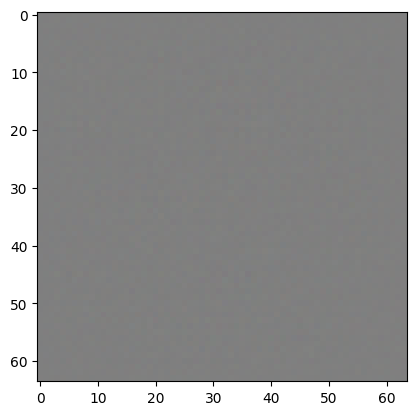

In [11]:
if LOADING_MODEL == False:
    random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
    # print(random_input)
    out = generator.predict(random_input)

    print(np.max(out), np.min(out))
    print(out.shape)
    # print(out[0])
    plt.imshow(out[0])
    plt.show()


In [12]:
import multiprocessing.pool
import tensorflow
import os
real_dataset = keras.utils.image_dataset_from_directory(
    "C:\\Users\\Jasiek\\Desktop\\main\\EDU\\EDU sem7\\crawled_cakes",
    labels=None,
    label_mode=None,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=None,
)



Found 1436 files belonging to 1 classes.


In [13]:
real_data = np.array(list(real_dataset))/255
# real_data.
# tensorflow.data.Dataset.as_numpy_iterator(
# )

(1436, 64, 64, 3)
[[[0.12941177 0.15882353 0.14411765]
  [0.12941177 0.16078432 0.14411765]
  [0.12843138 0.15980393 0.14411765]
  ...
  [0.10490196 0.15294118 0.14803922]
  [0.10392157 0.15490197 0.15196079]
  [0.10392157 0.14901961 0.14509805]]

 [[0.12941177 0.15882353 0.14509805]
  [0.12843138 0.16078432 0.14509805]
  [0.12941177 0.16078432 0.14901961]
  ...
  [0.10980392 0.14901961 0.14509805]
  [0.09705883 0.15294118 0.16176471]
  [0.10882353 0.14705883 0.14509805]]

 [[0.12941177 0.15686275 0.14509805]
  [0.12254902 0.15392157 0.14215687]
  [0.12156863 0.15294118 0.14215687]
  ...
  [0.10980392 0.14901961 0.14901961]
  [0.11372549 0.14901961 0.15392157]
  [0.10392157 0.14705883 0.14803922]]

 ...

 [[0.11372549 0.11666667 0.10980392]
  [0.11176471 0.11372549 0.10980392]
  [0.10980392 0.11372549 0.10588235]
  ...
  [0.3852941  0.29607844 0.26862746]
  [0.07745098 0.06470589 0.06960785]
  [0.7480392  0.6647059  0.71862745]]

 [[0.11764706 0.12156863 0.11372549]
  [0.11666667 0.117

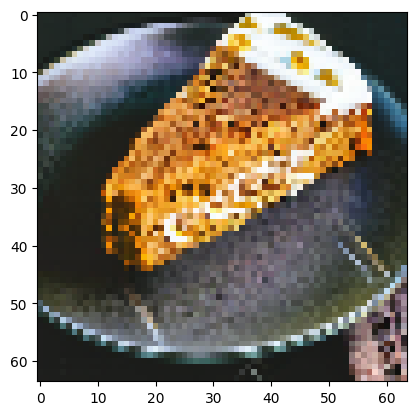

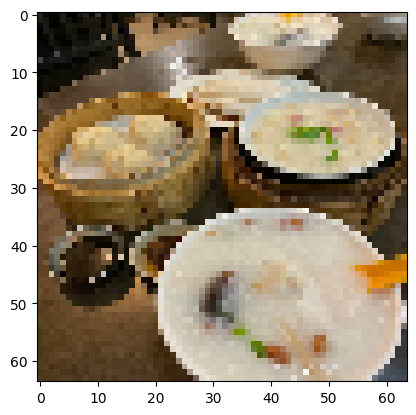

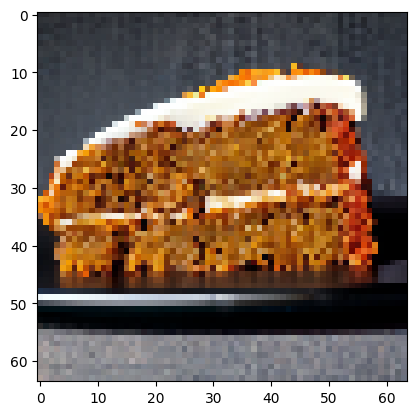

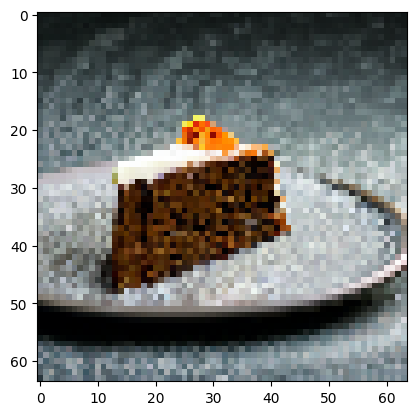

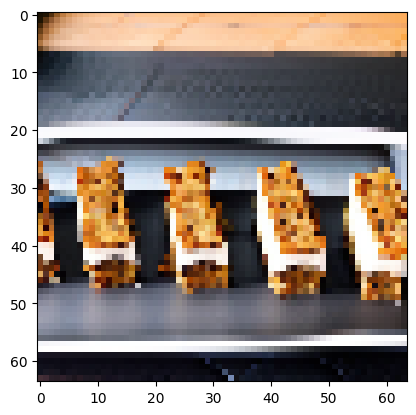

In [14]:
print(real_data.shape)
print(real_data[0])
for i in range(5):
    plt.imshow(real_data[i])
    plt.show()

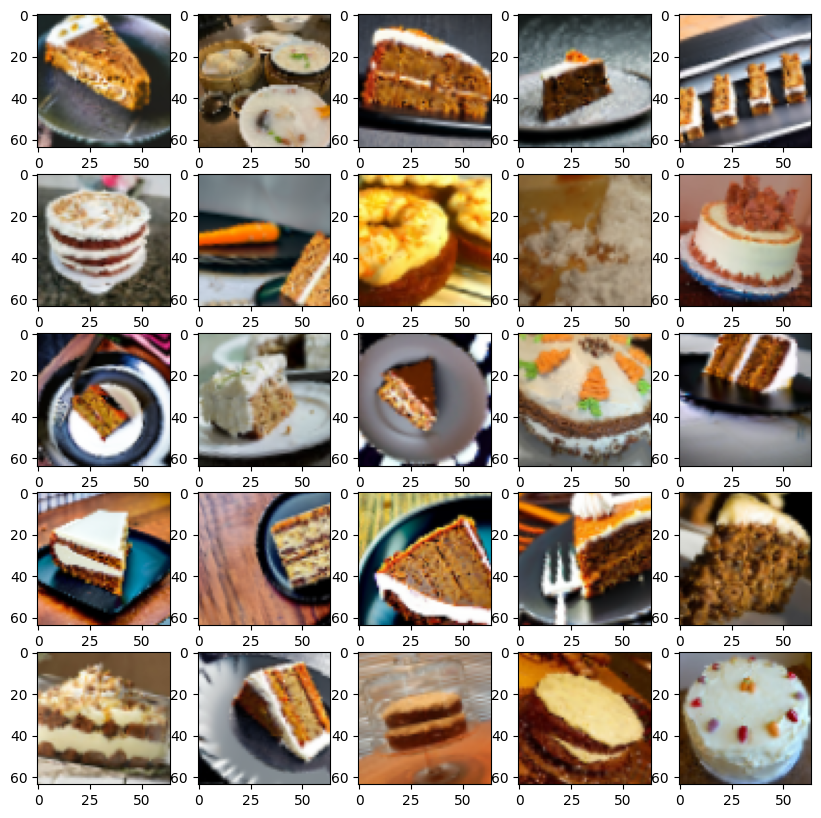

In [15]:
augumentor_tester = keras.models.Sequential([
    keras.layers.Input((IMG_SIZE, IMG_SIZE, 3)),
    augumentor,
])
augumentor_tester.compile()
augumented_example = augumentor_tester(real_data[:25])

imgs = augumented_example
_, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()


Note that layers (such that BatchNorm) do the learning in forward phase, so you have to set them to eval() too

In [16]:
import torch
BATCH_SIZE = 32

y_real_data = np.ones(len(real_data))

real_dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(real_data), torch.from_numpy(y_real_data)
)

real_dataloader = torch.utils.data.DataLoader(
    real_dataset, batch_size=BATCH_SIZE//2, shuffle=True
)



In [17]:
def check_weights_change(org_dirscr_weights, org_gen_weights, discriminator_training: bool):
    if discriminator_training:
        print("discriminator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('WARNING the discriminator weights did not change')
        else:
            print("good, the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('good, the generator weights did not change')
        else:
            print("WARNING the generator weights layer changed")
    else:
        print("generator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('good, the discriminator weights did not change')
        else:
            print("WARNING the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('WARNING the generator weights did not change')
        else:
            print("good, the generator weights layer changed")

In [18]:
if LOADING_MODEL == False:
    discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss=keras.losses.BinaryCrossentropy())
    generator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss=keras.losses.BinaryCrossentropy())

In [19]:
validation_input = np.random.default_rng(seed = 420).normal(0, 1, (25, GEN_INPUT_SIZE))

In [20]:
from datetime import datetime

def train_disciminator(real_inputs, real_targets):
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    generated_inputs = generator(random_inputs)

    x_train = keras.ops.append(real_inputs, generated_inputs, axis = 0)
    y_train = keras.ops.append(
        real_targets - np.random.uniform(0, 0.05, real_targets.shape),
        np.random.uniform(0, 0.05, len(generated_inputs)),
        axis=0)
    # y_train += np.random.uniform(-0.05, 0.05, y_train.shape)
    outputs = discriminator(x_train)
    loss = discriminator.loss(y_train, outputs)

    discriminator.zero_grad()
    trainable_weights = [v for v in discriminator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        discriminator.optimizer.apply(gradients, trainable_weights)

    return loss

def train_generator():
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    x_gen_train = generator(random_inputs)
    y_gen_train = np.ones(len(x_gen_train))

    outputs = discriminator(x_gen_train)
    loss = generator.loss(y_gen_train, outputs)

    generator.zero_grad()
    trainable_weights = [v for v in generator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        generator.optimizer.apply(gradients, trainable_weights)

    return loss

In [21]:
if LOADING_MODEL == False:
    discriminator.optimizer.learning_rate.assign(0.00001/2)
    discriminator.optimizer.learning_rate

In [23]:
if LOADING_MODEL == True:
    generator = keras.saving.load_model("training\\models\\generator_120_07-11-2023_20-17-19.keras")
    discriminator = keras.saving.load_model("training\\models\\discriminator_120_07-11-2023_20-17-19.keras")
random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
# print(random_input)
out = generator.predict(random_input)

print(np.max(out), np.min(out))
print(out.shape)
# print(out[0])
plt.imshow(out[0])
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 64, but received input with shape (1, 128)[0m

Arguments received by Sequential.call():
  • inputs=torch.Tensor(shape=torch.Size([1, 128]), dtype=float32)
  • training=False
  • mask=None

In [ ]:

CHECK_WEIGHTS = False

for epoch in range(0, 21):
    print(f"epoch {epoch}")
    gen_losses = []
    discr_losses = []
    for step, (real_inputs, real_targets) in enumerate(real_dataloader):
        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            print(step)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        discr_losses.append(train_disciminator(real_inputs, real_targets).detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, True)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        gen_losses.append(train_generator().detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, False)

    print(f"Generator avg loss:     {np.mean(gen_losses)}")
    print(f"Discriminator avg loss: {np.mean(discr_losses)}")

    now = datetime.now()
    time = now.strftime('%d-%m-%Y_%H-%M-%S')
    if epoch%50 == 0:
        generator.save(f"training\\models\\generator_{epoch}_{time}.keras")
        discriminator.save(f"training\\models\\discriminator_{epoch}_{time}.keras")

    if epoch <= 20 or (epoch%20 == 0 and epoch <= 500) or epoch%50 == 0:
        imgs = generator.predict(validation_input)
        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()
        for img, ax in zip(imgs, axs):
            ax.imshow(img)
        plt.savefig(f"training\\results\\imgs_{epoch}_{time}.png")
        plt.show()
